# Preprocessing

In [4]:
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [817]:
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [819]:
data=pd.read_csv("C:/Users/rowaida.montaser/OneDrive/Titanic_task/train.csv")
data_copy1 = data.copy()
data_copy2=data.copy()
data_copy3=data.copy()
copy_df=data.copy()

In [821]:
copy_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [823]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [825]:
copy_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# check missing values

In [828]:
copy_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# handling missing values

cabin feature has many null values

Mean Imputation: Replace missing values with the mean of the column. Works well when the data is normally distributed.

Median Imputation: Replace missing values with the median. This is useful when the data contains outliers or is skewed.

Mode Imputation: Replace missing values with the most frequent value. This can be helpful for categorical data.

In [831]:
#since the Cabin column has a high percentage of missing values ,PassengerId is just an identifier & Ticket doesn't  provide useful info
copy_df = copy_df.drop(columns=['Cabin','PassengerId','Ticket'], axis = 1) #it has too many missing values


In [833]:
copy_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


check skeewnss & distribution to detrmine how fill null values in Age by mean or median

If the distribution of ages is not normal (skewed), the median gives a better sense of the typical age. 
In skewed distributions, the mean can be misleading because it may be pulled toward the skew.

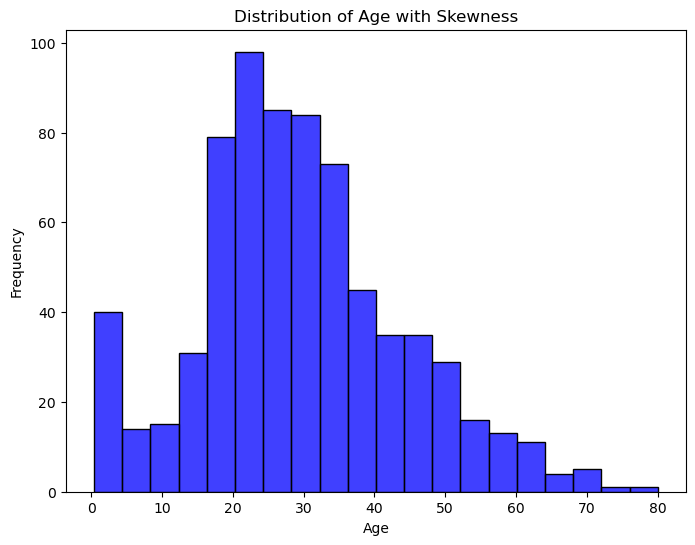

(0.38910778230082704, None)

In [836]:
# Checking skewness of 'Age' column
age_skewness = copy_df['Age'].skew()

# Plotting histogram to visually the distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(copy_df['Age'], bins=20, color='blue')
plt.title('Distribution of Age with Skewness')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the skewness value and the plot
age_skewness, plt.show()  #the skewness value is Greater than 0.right skewee ,mean almost 30

In [837]:
#median_age = data['Age'].median()
copy_df['Age'] = copy_df['Age'].fillna(copy_df['Age'].median()) #Fill missing values in the 'Age' column with the median as it has outliers. 
copy_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [840]:
copy_df['Age'].mode()

0    28.0
Name: Age, dtype: float64

In [842]:
#fill categoricall with mode or unknown
copy_df['Embarked'] = copy_df['Embarked'].fillna(copy_df['Embarked'].mode()[0])
copy_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Handling Duplicates

In [845]:
copy_df.duplicated() 


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [847]:
copy_df.duplicated().sum()

0

# Handling Incorrect Data Types

In [850]:
#sex and embarked are categorical but stored as object(string)
# Convert 'Sex' and 'Embarked' to categorical to save memory and improve performance.
copy_df['Sex'] = copy_df['Sex'].astype('category')
copy_df['Embarked'] = copy_df['Embarked'].astype('category')

# the updated data types
print(copy_df.dtypes)

Survived       int64
Pclass         int64
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object


# Handling outliers

In [853]:
def get_outliers(column):
    Q1 = copy_df[column].quantile(0.25)
    Q3 = copy_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = copy_df[(copy_df[column] < lower_bound) | (copy_df[column] > upper_bound)]
    return outliers

# Get outliers for each numerical column
outliers_age = get_outliers('Age')
outliers_fare = get_outliers('Fare')
outliers_sibsp = get_outliers('SibSp')
outliers_parch = get_outliers('Parch')

# Display outliers count for each column
{
    "Age Outliers": len(outliers_age),
    "Fare Outliers": len(outliers_fare),
    "SibSp Outliers": len(outliers_sibsp),
    "Parch Outliers": len(outliers_parch)
}

{'Age Outliers': 66,
 'Fare Outliers': 116,
 'SibSp Outliers': 46,
 'Parch Outliers': 213}

# Detecting outliers
1.IQR

2.z-score

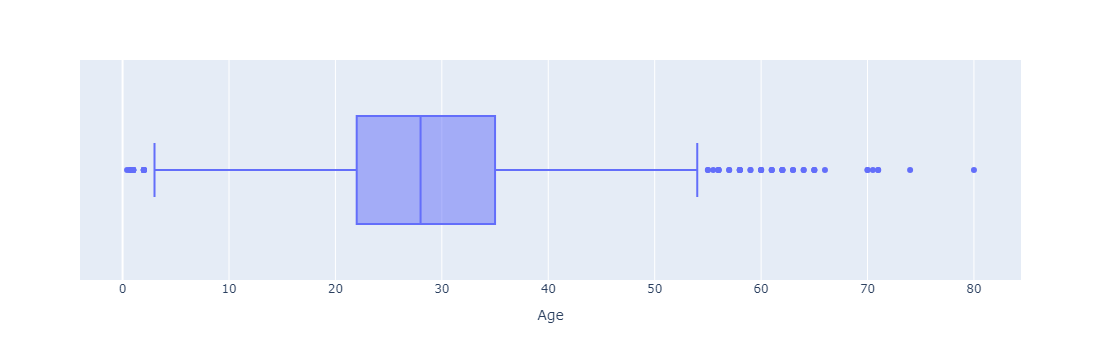

In [856]:
fig=px.box(copy_df,x='Age')
fig.show()

In [858]:
#from scipy.stats import zscore
#data['Z_score'] = zscore(data['Age'])
#outliers = data[data['Z_score'].abs() > 3]
#print(outliers)

In [860]:
# Calculate IQR
Q1_age = copy_df['Age'].quantile(0.25)
Q3_age = copy_df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
 
# Define the lower and upper bounds for outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age= Q3_age + 1.5 * IQR_age
# Filter outliers
outliers_age = copy_df[(copy_df['Age'] < lower_bound_age) | (copy_df['Age'] > upper_bound_age)]
# Display outliers
print(outliers_age)
print(outliers_age.shape)
print("lower_bound=",lower_bound_age)
print("upper_bound=",upper_bound_age)
print("num of outliers=",len(outliers_age))




     Survived  Pclass                                           Name     Sex  \
7           0       3                 Palsson, Master. Gosta Leonard    male   
11          1       1                       Bonnell, Miss. Elizabeth  female   
15          1       2               Hewlett, Mrs. (Mary D Kingcome)   female   
16          0       3                           Rice, Master. Eugene    male   
33          0       2                          Wheadon, Mr. Edward H    male   
..        ...     ...                                            ...     ...   
827         1       2                          Mallet, Master. Andre    male   
829         1       1      Stone, Mrs. George Nelson (Martha Evelyn)  female   
831         1       2                Richards, Master. George Sibley    male   
851         0       3                            Svensson, Mr. Johan    male   
879         1       1  Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female   

       Age  SibSp  Parch     Fare Embar

# handling outliers
1.Drop

2.clip()

In [863]:
#1clip()
# Apply the clip method to limit the age values
#data['Age_clipped'] = data['Age'].clip(lower=lower_bound_age, upper=upper_bound_age)
#len(data['Age_clipped'])

In [865]:
#print(data['Age_clipped'].max()) #= upper bound
#print(data['Age_clipped'].min()) #= lower bound

In [867]:
#Drop outliers
data_age_dropped=copy_df[(copy_df['Age'] >= lower_bound_age) & (copy_df['Age'] <= upper_bound_age)]
len(data_age_dropped) #891-66=825

825

# fare Outliers

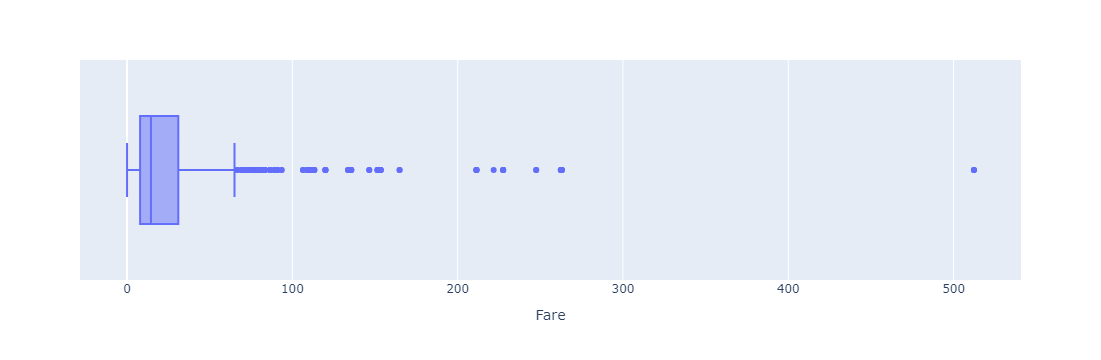

In [870]:
fig=px.box(copy_df,x='Fare')
fig.show()


In [872]:
data_age_dropped["Fare"].mean()

31.483615393939395

In [874]:
# Calculate IQR
Q1_fare = data_age_dropped['Fare'].quantile(0.25)
Q3_fare= data_age_dropped['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
 
# Define the lower and upper bounds for outliers
lower_bound_Fare = Q1_fare - 1.5 * IQR_fare
upper_bound_Fare= Q3_fare + 1.5 * IQR_fare
 
# Filter outliers
outliers_Fare = data_age_dropped[(data_age_dropped['Fare'] < lower_bound_Fare) | (data_age_dropped['Fare'] > upper_bound_Fare)]
 
# Display outliers
print(outliers_Fare)
print(outliers_Fare.shape)
print("lower_bound=",lower_bound_Fare)
print("upper_bound=",upper_bound_Fare)
print("num of outliers=",len(outliers_Fare))


     Survived  Pclass                                               Name  \
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
27          0       1                     Fortune, Mr. Charles Alexander   
31          1       1     Spencer, Mrs. William Augustus (Marie Eugenie)   
34          0       1                            Meyer, Mr. Edgar Joseph   
52          1       1           Harper, Mrs. Henry Sleeper (Myna Haxtun)   
..        ...     ...                                                ...   
835         1       1                        Compton, Miss. Sara Rebecca   
846         0       3                           Sage, Mr. Douglas Bullen   
849         1       1       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)   
856         1       1         Wick, Mrs. George Dennick (Mary Hitchcock)   
863         0       3                  Sage, Miss. Dorothy Edith "Dolly"   

        Sex   Age  SibSp  Parch      Fare Embarked  
1    female  38.0      1      0   

In [876]:
#Drop outliers
data_fare_dropped=data_age_dropped[(data_age_dropped['Fare'] >= lower_bound_Fare) & (data_age_dropped['Fare'] <= upper_bound_Fare)]
len(data_fare_dropped) #825-107

718

# sibsp outliers

In [879]:
# Calculate IQR
Q1_sibsp = data['SibSp'].quantile(0.25)
Q3_sibsp = data['SibSp'].quantile(0.75)
IQR_sibsp = Q3_sibsp - Q1_sibsp
 
# Define the lower and upper bounds for outliers
lower_bound_SibSp = Q1_sibsp - 1.5 * IQR_sibsp
upper_bound_SibSp= Q3_sibsp + 1.5 * IQR_sibsp
 
# Filter outliers
outliers_SibSp = data_fare_dropped[(data_fare_dropped['SibSp'] < lower_bound_SibSp) | (data_fare_dropped['SibSp'] > upper_bound_SibSp)]
 
print(outliers_SibSp)
print(outliers_SibSp.shape)
print("lower_bound=",lower_bound_SibSp)
print("upper_bound=",upper_bound_SibSp)
print("num of outliers=",len(outliers_SibSp))


     Survived  Pclass                                               Name  \
24          0       3                      Palsson, Miss. Torborg Danira   
50          0       3                         Panula, Master. Juha Niilo   
59          0       3                 Goodwin, Master. William Frederick   
63          0       3                              Skoog, Master. Harald   
68          1       3                    Andersson, Miss. Erna Alexandra   
71          0       3                         Goodwin, Miss. Lillian Amy   
85          1       3  Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...   
171         0       3                               Rice, Master. Arthur   
176         0       3                      Lefebre, Master. Henry Forbes   
182         0       3              Asplund, Master. Clarence Gustaf Hugo   
229         0       3                            Lefebre, Miss. Mathilde   
233         1       3                     Asplund, Miss. Lillian Gertrud   
261         

In [881]:
#Drop outliers
data_sibsp_dropped=data_fare_dropped[(data_fare_dropped['SibSp'] >= lower_bound_SibSp) & (data_fare_dropped['SibSp'] <= upper_bound_SibSp)]
len(data_sibsp_dropped) #718-29

689

# parch outliers

In [884]:
# Calculate IQR
Q1_parch= data_sibsp_dropped['Parch'].quantile(0.25)
Q3_parch = data_sibsp_dropped['Parch'].quantile(0.75)
IQR_parch = Q3_parch - Q1_parch
 
# Define the lower and upper bounds for outliers
lower_bound_Parch = Q1_parch - 1.5 * IQR_parch
upper_bound_Parch= Q3_parch + 1.5 * IQR_parch
 
# Filter outliers
outliers_Parch = data_sibsp_dropped[(data_sibsp_dropped['Parch'] < lower_bound_Parch) | (data_sibsp_dropped['Parch'] > upper_bound_Parch)]
 
print(outliers_Parch)
print(outliers_Parch.shape)
print("lower_bound=",lower_bound_Parch)
print("upper_bound=",upper_bound_Parch)
print("num of outliers=",len(outliers_Parch))


     Survived  Pclass                                               Name  \
8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
13          0       3                        Andersson, Mr. Anders Johan   
25          1       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
43          1       2           Laroche, Miss. Simonne Marie Anne Andree   
..        ...     ...                                                ...   
869         1       3                    Johnson, Master. Harold Theodor   
871         1       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
880         1       2       Shelley, Mrs. William (Imanita Parrish Hall)   
885         0       3               Rice, Mrs. William (Margaret Norton)   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   

        Sex   Age  SibSp  Parch     Fare Embarked  
8    female  27.0      0      2  11

In [886]:
#Drop outliers
data_parch_dropped=data_sibsp_dropped[(data_sibsp_dropped['Parch'] >= lower_bound_Parch) & (data_sibsp_dropped['Parch'] <= upper_bound_Parch)]
len(data_parch_dropped) 

577

In [910]:
data_parch_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  577 non-null    int64   
 1   Pclass    577 non-null    int64   
 2   Name      577 non-null    object  
 3   Sex       577 non-null    category
 4   Age       577 non-null    float64 
 5   SibSp     577 non-null    int64   
 6   Parch     577 non-null    int64   
 7   Fare      577 non-null    float64 
 8   Embarked  577 non-null    category
dtypes: category(2), float64(2), int64(4), object(1)
memory usage: 37.4+ KB


# handling inconsistent data

In [913]:
print(data_parch_dropped["Survived"].unique())
print(data_parch_dropped['Embarked'].unique())
print(data_parch_dropped['Sex'].unique())
print(data_parch_dropped['Pclass'].unique())

[0 1]
['S', 'Q', 'C']
Categories (3, object): ['C', 'Q', 'S']
['male', 'female']
Categories (2, object): ['female', 'male']
[3 1 2]


In [915]:
print(data_parch_dropped['Embarked'].value_counts())
print(data_parch_dropped['Sex'].value_counts())
print(data_parch_dropped['Pclass'].value_counts())

Embarked
S    433
C     80
Q     64
Name: count, dtype: int64
Sex
male      434
female    143
Name: count, dtype: int64
Pclass
3    373
2    121
1     83
Name: count, dtype: int64


In [917]:
# Check for unexpected values
print(data_parch_dropped[data_parch_dropped['Age'] < 0]) #empty
print(data_parch_dropped[data_parch_dropped['Fare'] < 0])


Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []
Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [919]:
data_parch_dropped.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [935]:
data_parch_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  577 non-null    int64   
 1   Pclass    577 non-null    int64   
 2   Name      577 non-null    object  
 3   Sex       577 non-null    int64   
 4   Age       577 non-null    float64 
 5   SibSp     577 non-null    int64   
 6   Parch     577 non-null    int64   
 7   Fare      577 non-null    float64 
 8   Embarked  577 non-null    category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 36.9+ KB


# handling categorical variables

1.**label encodeing** :each category is represented by a unique integer(label),used with **ordinal data**,

"female" will be encoded as 0
"male" will be encoded as 1

2.**one hot encoding**:creates a new binary column for each category value and assigns a 1 or 0 to indicate the presence or absence of that category,with **Nominal data** ,1 represents the presence of the category, and 0 indicates absence.

In [938]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
data_parch_dropped.loc[:, 'Sex'] = label_encoder.fit_transform(data_parch_dropped['Sex'])
data_parch_dropped[['Sex']].head() #0,1
data_parch_dropped = data_parch_dropped.reset_index(drop=True)


In [940]:
data_parch_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  577 non-null    int64   
 1   Pclass    577 non-null    int64   
 2   Name      577 non-null    object  
 3   Sex       577 non-null    int64   
 4   Age       577 non-null    float64 
 5   SibSp     577 non-null    int64   
 6   Parch     577 non-null    int64   
 7   Fare      577 non-null    float64 
 8   Embarked  577 non-null    category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 36.9+ KB


In [942]:
data_parch_dropped.loc[:, 'Pclass'] = label_encoder.fit_transform(data_parch_dropped['Pclass'])
data_parch_dropped[['Pclass']].head() #0,1,2


,Pclass
0,2
1,2
2,0
3,2
4,2


In [944]:
# Display unique values of the encoded columns
encoded_unique_values_pclass = data_parch_dropped['Pclass'].unique()
encoded_unique_values_sex = data_parch_dropped['Sex'].unique()

print("Unique values in the encoded 'Pclass' column:", encoded_unique_values_pclass)

print("Unique values in the encoded 'Pclass' column:", encoded_unique_values_sex)

Unique values in the encoded 'Pclass' column: [2 0 1]
Unique values in the encoded 'Pclass' column: [1 0]


In [946]:
# One-hot encoding 'Embarked'
#creates binary columns for each category

#**drop_first=True**to aavoid multicollinearity(one of the new columns can be predicted from the others)so it drops the column of first category
data_parch_dropped = pd.get_dummies(data_parch_dropped, columns=['Embarked'],drop_first=True) 

In [948]:
data_parch_dropped

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,False,True
1,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,False,True
2,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,False,True
3,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,False,True
4,0,2,"Moran, Mr. James",1,28.0,0,0,8.4583,True,False
...,...,...,...,...,...,...,...,...,...,...
572,0,2,"Sutehall, Mr. Henry Jr",1,25.0,0,0,7.0500,False,True
573,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,False,True
574,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,False,True
575,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,False,False


# handling Multicollinearity

same relationship between multi variables(redundancy)
where two or more predictors are highly correlated. 
one of the new columns can be predicted from the others.


In [951]:
print("Columns in DataFrame:")
print(data_parch_dropped.columns)


Columns in DataFrame:
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [953]:
print(data_parch_dropped.dtypes)


Survived        int64
Pclass          int64
Name           object
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [955]:
# Convert boolean columns to integers (0 and 1)
data_parch_dropped[['Embarked_Q', 'Embarked_S']] = data_parch_dropped[['Embarked_Q', 'Embarked_S']].astype(int)

In [957]:
print(data_parch_dropped.dtypes)

Survived        int64
Pclass          int64
Name           object
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q      int32
Embarked_S      int32
dtype: object


In [959]:
# Select only numeric columns for correlation
numeric_data = data_parch_dropped.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.242189,-0.526748,0.009310,0.097999,NaN,0.268890,0.118176,-0.147059
Pclass,-0.242189,1.000000,0.037617,-0.363467,-0.078664,NaN,-0.670942,0.224539,-0.085339
Sex,-0.526748,0.037617,1.000000,0.077456,-0.185057,NaN,-0.070345,-0.206292,0.169853
Age,0.009310,-0.363467,0.077456,1.000000,0.029707,NaN,0.265009,-0.094569,0.103431
SibSp,0.097999,-0.078664,-0.185057,0.029707,1.000000,NaN,0.345588,-0.009379,-0.029720
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.268890,-0.670942,-0.070345,0.265009,0.345588,NaN,1.000000,-0.142515,0.021408
Embarked_Q,0.118176,0.224539,-0.206292,-0.094569,-0.009379,NaN,-0.142515,1.000000,-0.612483
Embarked_S,-0.147059,-0.085339,0.169853,0.103431,-0.029720,NaN,0.021408,-0.612483,1.000000


In [961]:
# Drop the selected columns
data_cleaned = data_parch_dropped.drop(columns=['Embarked_Q'],axis=1)  # Drop one of the Embarked columns
data_cleaned

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_S
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1
1,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1
2,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1
3,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1
4,0,2,"Moran, Mr. James",1,28.0,0,0,8.4583,0
...,...,...,...,...,...,...,...,...,...
572,0,2,"Sutehall, Mr. Henry Jr",1,25.0,0,0,7.0500,1
573,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,1
574,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,1
575,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0


In [963]:
#pclass&fare :Strong negative correlation, indicating that passengers in higher classes paid more on average so can drop one of them
#data_cleaned = data_parch_dropped.drop(columns=['fare']) 


In [965]:
data_cleaned = data_cleaned.drop(columns=['Name'],axis=1)
#Removing irrelevant or non-numeric columns, like Name, reduces noise and helps improve model efficiency.
#since names typically do not provide useful numerical information for the prediction task

In [967]:
data_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S
0,0,2,1,22.0,1,0,7.2500,1
1,1,2,0,26.0,0,0,7.9250,1
2,1,0,0,35.0,1,0,53.1000,1
3,0,2,1,35.0,0,0,8.0500,1
4,0,2,1,28.0,0,0,8.4583,0
...,...,...,...,...,...,...,...,...
572,0,2,1,25.0,0,0,7.0500,1
573,0,1,1,27.0,0,0,13.0000,1
574,1,0,0,19.0,0,0,30.0000,1
575,1,0,1,26.0,0,0,30.0000,0


In [969]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    577 non-null    int64  
 1   Pclass      577 non-null    int64  
 2   Sex         577 non-null    int64  
 3   Age         577 non-null    float64
 4   SibSp       577 non-null    int64  
 5   Parch       577 non-null    int64  
 6   Fare        577 non-null    float64
 7   Embarked_S  577 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 33.9 KB


In [971]:
#it has limited unique values or if analysis shows it does not significantly impact the model's performance.no parents or children 
print(data_cleaned['Parch'].unique())
data_cleaned = data_cleaned.drop(columns=['Parch'])


[0]


In [973]:
data_cleaned

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_S
0,0,2,1,22.0,1,7.2500,1
1,1,2,0,26.0,0,7.9250,1
2,1,0,0,35.0,1,53.1000,1
3,0,2,1,35.0,0,8.0500,1
4,0,2,1,28.0,0,8.4583,0
...,...,...,...,...,...,...,...
572,0,2,1,25.0,0,7.0500,1
573,0,1,1,27.0,0,13.0000,1
574,1,0,0,19.0,0,30.0000,1
575,1,0,1,26.0,0,30.0000,0


# Data Bining
is a technique in data preprocessing where continuous variables are converted into discrete bins or intervals.

Binning is often used to reduce noise in the data, make models more robust

In [976]:
print(data_cleaned["Age"].unique())
print(data_cleaned["Age"].max())

[22.  26.  35.  28.  54.  14.  20.  31.  34.  15.  40.  42.  21.  18.
 27.  19.  29.  28.5 32.  25.  30.  17.  24.  46.  33.  37.  38.  47.
 14.5 32.5 12.  45.  23.  16.  51.  50.  36.  44.  45.5 20.5 23.5 39.
 52.  48.  40.5 53.  49.  43.  24.5 11.  41.  30.5  5.  13.  34.5]
54.0


In [978]:
data_cleaned["Age"]

0      22.0
1      26.0
2      35.0
3      35.0
4      28.0
       ... 
572    25.0
573    27.0
574    19.0
575    26.0
576    32.0
Name: Age, Length: 577, dtype: float64

In [980]:
# Binning Age into categories
# cut() converts continous variables into discrete or categorical
data_cleaned['Age_Group'] = pd.cut(data_cleaned['Age'], bins=[0, 12, 18, 35, 54], labels=['Child', 'Teenager', 'Young Adult', 'Adult'])
print(data_cleaned['Age_Group'].head())

0    Young Adult
1    Young Adult
2    Young Adult
3    Young Adult
4    Young Adult
Name: Age_Group, dtype: category
Categories (4, object): ['Child' < 'Teenager' < 'Young Adult' < 'Adult']


In [986]:
data_cleaned

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_S,Age_Group
0,0,2,1,22.0,1,7.2500,1,Young Adult
1,1,2,0,26.0,0,7.9250,1,Young Adult
2,1,0,0,35.0,1,53.1000,1,Young Adult
3,0,2,1,35.0,0,8.0500,1,Young Adult
4,0,2,1,28.0,0,8.4583,0,Young Adult
...,...,...,...,...,...,...,...,...
572,0,2,1,25.0,0,7.0500,1,Young Adult
573,0,1,1,27.0,0,13.0000,1,Young Adult
574,1,0,0,19.0,0,30.0000,1,Young Adult
575,1,0,1,26.0,0,30.0000,0,Young Adult


In [992]:
print(data_cleaned['Age_Group'].value_counts()) 

Age_Group
Young Adult    423
Adult          109
Teenager        42
Child            3
Name: count, dtype: int64


In [996]:
adult_passengers = data_cleaned[data_cleaned['Age_Group'] == 'Adult']

In [998]:
adult_passengers

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_S,Age_Group
5,0,0,1,54.0,0,51.8625,1,Adult
19,0,0,1,40.0,0,27.7208,0,Adult
21,0,0,1,42.0,1,52.0000,1,Adult
26,0,2,0,40.0,1,9.4750,1,Adult
61,0,0,1,46.0,1,61.1750,1,Adult
...,...,...,...,...,...,...,...,...
551,1,0,1,51.0,0,26.5500,1,Adult
553,0,2,1,41.0,2,14.1083,1,Adult
555,1,0,0,48.0,0,25.9292,1,Adult
557,1,1,0,42.0,0,13.0000,1,Adult


In [137]:
child_passengers = without_name[without_name['Age_Group'] == 'Child']

In [139]:
child_passengers

,Survived,Pclass,Age,SibSp,Fare,Sex_male,Embarked_S,Age_Group
125,1,2,12.0,1,11.2417,1,0,Child
731,0,2,11.0,0,18.7875,1,0,Child
777,1,2,5.0,0,12.4750,0,1,Child


In [1001]:
#applying label encoding in Age_Group to be (0,1,2,3)
data_cleaned['Age_Group'] = label_encoder.fit_transform(data_cleaned['Age_Group'])

In [1003]:
data_cleaned

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_S,Age_Group
0,0,2,1,22.0,1,7.2500,1,3
1,1,2,0,26.0,0,7.9250,1,3
2,1,0,0,35.0,1,53.1000,1,3
3,0,2,1,35.0,0,8.0500,1,3
4,0,2,1,28.0,0,8.4583,0,3
...,...,...,...,...,...,...,...,...
572,0,2,1,25.0,0,7.0500,1,3
573,0,1,1,27.0,0,13.0000,1,3
574,1,0,0,19.0,0,30.0000,1,3
575,1,0,1,26.0,0,30.0000,0,3


In [1005]:
data_cleaned["Age_Group"].unique()

array([3, 0, 2, 1])

# feature engineering
is the process of creating new features from existing ones 

In [1007]:
# Combine Pclass and Age_Group into a new feature
data_cleaned['Class_AgeGroup'] = data_cleaned['Pclass'].astype(str) + '_' + data_cleaned['Age_Group'].astype(str)
#pclass[0,1,2][class 1,class 2 ,class 3]
#Age_Group[0,1,2,3]) [child ,teen,young adult,adult]

In [1009]:
data_cleaned

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_S,Age_Group,Class_AgeGroup
0,0,2,1,22.0,1,7.2500,1,3,2_3
1,1,2,0,26.0,0,7.9250,1,3,2_3
2,1,0,0,35.0,1,53.1000,1,3,0_3
3,0,2,1,35.0,0,8.0500,1,3,2_3
4,0,2,1,28.0,0,8.4583,0,3,2_3
...,...,...,...,...,...,...,...,...,...
572,0,2,1,25.0,0,7.0500,1,3,2_3
573,0,1,1,27.0,0,13.0000,1,3,1_3
574,1,0,0,19.0,0,30.0000,1,3,0_3
575,1,0,1,26.0,0,30.0000,0,3,0_3


# groupby

Group the data based on one or more categorical columns.
.
Class Influence:Passengers in first class (Pclass 0) generally have higher survival rates, especially females. Second and third-class passengers tend to have lower survival probabilities, particularly for males.

Age Influence:Children (0-12) appear to have a much higher survival rate, especially females, compared to adults.

In [1034]:

survival_rates = data_cleaned.groupby(['Class_AgeGroup', 'Sex'])['Survived'].mean().reset_index()
print(survival_rates)


   Class_AgeGroup  Sex  Survived
0             0_0    0  0.875000
1             0_0    1  0.392857
2             0_2    0  1.000000
3             0_3    0  1.000000
4             0_3    1  0.432432
5             1_0    0  0.833333
6             1_0    1  0.047619
7             1_2    0  1.000000
8             1_2    1  0.000000
9             1_3    0  0.925926
10            1_3    1  0.113208
11            2_0    0  0.200000
12            2_0    1  0.085714
13            2_1    0  1.000000
14            2_1    1  0.500000
15            2_2    0  0.562500
16            2_2    1  0.117647
17            2_3    0  0.606557
18            2_3    1  0.127119


In [1036]:
class_fare=data_cleaned.groupby('Pclass')['Survived'].mean()
print(class_fare)

Pclass
0    0.530120
1    0.371901
2    0.225201
Name: Survived, dtype: float64


# Aggregation


In [1042]:
# Aggregating statistics
pclass_aggr = data_cleaned.groupby(['Pclass']).agg({
    'Survived': ['mean', 'count'],
    'Fare': ['mean'],
    'SibSp': ['mean'],
}).reset_index()

print(pclass_aggr)

  Pclass  Survived             Fare     SibSp
              mean count       mean      mean
0      0  0.530120    83  36.091466  0.277108
1      1  0.371901   121  15.440047  0.214876
2      2  0.225201   373  10.050054  0.176944


# feature scaling & normalization techniques 

# 1.Min-Max Scaling:
When to Use: Common in machine learning models that require features to be in a specific range, like neural networks and KNN.
Why: Scales data to a specified range **(usually [0, 1])**, retaining the original data distribution.
**Formula:** `Xscaled=(X−Xmin)/(Xmax−Xmin)`

# 2.Z-score Normalization (Standardization):
When to Use: When data needs to be centered around zero and have unit variance, often in algorithms sensitive to data distributions, like linear regression,logistic regression, and K-means .
Why: Ensures features are comparable by transforming data into a distribution **with mean zero and standard deviation one**.
**Formula:** `𝑧=(𝑥−mean)/standard deviation`
preferred than minmax scaling when data is normal distribution 

# 3.Robust Scaling:
When to Use: **With data that contains outliers** as it reduces the impact of outliers,it’s less sensitive to extreme values.
Why: It scales data using the interquartile range (IQR) and median, providing more robust scaling than standardization.
**Formula:** `Xscaled = (X−median)/IQR`

# 4.Max Abs Scaling:
When to Use: **Ideal for sparse data (many zeros)**,scaling to a range of **-1 to 1**is beneficial without altering zero values.
Why: Divides each feature by its maximum absolute value 
**Formula:** `Xscaled = X / ∣Xmax∣`

# 5.L1 and L2 Normalization:
When to Use: Suitable for algorithms relying on distance or dot product, like k-nearest neighbors or support vector machines.
Why: L1 normalization scales each observation by the absolute sum of values (Manhattan norm), while L2 scales by the square root of the sum of the squared values (the Euclidean norm), ensuring each observation has unit length.
    **Formulas:**
        - L1: `𝑋scaled = 𝑋 / ∑∣𝑋∣`
        - L2: `Xscaled = 𝑋 / √∑X²`²`²`
# 6.Decimal Scaling:
When to Use: When data values vary significantly and need reduction to a similar range without losing interpretability, common in applications with strictly positive data.
Why: Shifts the decimal place to bring all values to a manageable scale, maintaining interpretabili**Formula:** `Xscaled = X / 10^𝑗` where 𝑗 is the smallest integer such that all values fall between -1 and 1.`y.

# 7.Log Transformation:
When to Use: For data with a highly skewed distribution, such as income or population data, where linear relationships are important.
Why: Compresses large values and expands smaller values, improving the normality of data**Formula:*
* `𝑋transformed = log(𝑋+𝑐)X` 
.

# 8.Power Transformation:
When to Use: When the data shows skewness that impacts model performance, especially in linear models and regression.
Why: The Box-Cox or Yeo-Johnson transformations make the data more normal-like and can stabilize varianc
**Formulas:**
        - Box-Cox: For positive data onl    
            `𝑋transformed = (𝑋^𝜆 − 1) / 𝜆`  for `𝜆≠0`.
            - Yeo-Johnson: Extends to both positive and negative .an L1.
​alues.e.

**Since 'Embarked_S', and 'Survived' are already binary with values between 0 and 1, they don’t need further scaling**.

In [1053]:
# Initialize the scaler
scaler = MinMaxScaler()
# Select the columns to normalize
columns_to_normalize = ['SibSp', 'Fare','Age']
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])


In [1055]:
data_cleaned.describe() #min=0 & max=1

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_S,Age_Group
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.299827,1.502600,0.752166,0.495986,0.099653,0.243994,0.750433,2.350087
std,0.458579,0.733909,0.432129,0.174524,0.222517,0.206073,0.433138,1.172073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.387755,0.000000,0.127094,1.000000,2.000000
50%,0.000000,2.000000,1.000000,0.469388,0.000000,0.141602,1.000000,3.000000
75%,1.000000,2.000000,1.000000,0.561224,0.000000,0.259093,1.000000,3.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#standardization
#scaler = StandardScaler()
#without_name[columns_to_normalize] = scaler.fit_transform(without_name[columns_to_normalize])

# Reshaping Data
refers to the process of transforming the structure or format of a dataset to better fit the requirements of the model.

1.**pivoting**:Pivot tables are a useful to summarize and aggregate data.

2.**transpose**:This means that the rows become columns, and the columns become rows. This can be particularly useful when you want to view the data in a different orientation

3.**stack & unstack**: stack Converts columns into rows and creates a hierarchical index(multi columns into single column),
unstack Converts rows back into columns


In [152]:
#This pivot table shows the average survival rate for each Pclass (1, 2, 3) by Sex (male, female).
pivot_copy3 = pd.pivot_table(data_copy3, values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print(pivot_copy3)


Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [154]:
#swaps rows and columns in a DataFrame
transposed_copy3 = data_copy3[['Pclass', 'Name','Survived']].head().T #or transpose()
transposed_copy3

,0,1,2,3,4
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Survived,0,1,1,1,0


In [162]:
#before stacking
subset = data_copy3[['Pclass', 'Age']]
print(subset.head())

print("\n After stacking \n")
stacked = subset.stack()
print(stacked.head())

   Pclass   Age
0       3  22.0
1       1  38.0
2       3  26.0
3       1  35.0
4       3  35.0

 After stacking 

0  Pclass     3.0
   Age       22.0
1  Pclass     1.0
   Age       38.0
2  Pclass     3.0
dtype: float64


In [166]:
# Unstack the result back into a DataFrame
unstacked = stacked.unstack()
print("After unstacking:")
print(unstacked)

After unstacking:
     Pclass   Age
0       3.0  22.0
1       1.0  38.0
2       3.0  26.0
3       1.0  35.0
4       3.0  35.0
..      ...   ...
886     2.0  27.0
887     1.0  19.0
888     3.0   NaN
889     1.0  26.0
890     3.0  32.0

[891 rows x 2 columns]


# Dealing with sparse date :
handling columns with many missing or zero values

1.**Drop Sparse Columns**:If a column has a high proportion of missing or zero values, it won't be useful for analysis or model so can remove these columns.

2.**sparse format**:Sparse formats (sparse representations) store only the non-zero and non-null values in a dataset,
the memory does not store any information about zeros or missing data, either as values or as indices.
it keeps track of the locations of these values, but does not explicitly store them in memory


In [97]:
#data_copy3['Cabin'] = data_copy3['Cabin'].replace({np.nan: None})

# Convert Cabin column to sparse type with appropriate fill_value
data_copy3['Cabin'] = pd.arrays.SparseArray(data_copy3['Cabin'])
data_copy3.info()

#data_copy3['Cabin'] = data_copy3['Cabin'].astype(pd.SparseDtype('str', fill_value=''))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   PassengerId  891 non-null    int64              
 1   Survived     891 non-null    int64              
 2   Pclass       891 non-null    int64              
 3   Name         891 non-null    object             
 4   Sex          891 non-null    object             
 5   Age          714 non-null    float64            
 6   SibSp        891 non-null    int64              
 7   Parch        891 non-null    int64              
 8   Ticket       891 non-null    object             
 9   Fare         891 non-null    float64            
 10  Cabin        1 non-null      Sparse[object, nan]
 11  Embarked     889 non-null    object             
dtypes: Sparse[object, nan](1), float64(2), int64(5), object(4)
memory usage: 79.1+ KB


C:\Users\rowaida.montaser\AppData\Local\Temp\ipykernel_23036\2580278684.py:5: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  data_copy3.info()


In [99]:
#The thresh(threshold) parameter specifies the minimum number of non-null (non-missing) values required to keep a column,
#the common percentages are 80%,90%,70% ,increase the thresh with the important features you want to keep them

#drop any column in the Data  that has fewer than 80% non-null values
data_copy3.dropna(axis=1, thresh=int(0.8*len(data_copy3)),inplace=True)
data_copy3

C:\Users\rowaida.montaser\AppData\Local\Temp\ipykernel_23036\2252457782.py:5: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  data_copy3.dropna(axis=1, thresh=int(0.8*len(data_copy3)),inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Type casting
type casting is the process of changing the data type of a column to a more appropriate or efficient type to improve memory usage.

**Float to Integer:**
when the precision of a float isn't necessary, and values can be rounded or truncated without losing significant information
(converting ages or income).

**Object/String to Category:**
Converting string/object data types to categorical types(like "sex" "Eembarked")helps save memory.

**Object/Date to DateTime:**
Date strings should be converted to datetime types to enable easy manipulation (extracting day, month, year).

**Binary Columns to Boolean:**
Converting binary columns (0/1 or True/False) to boolean types (T/F)can make logical operations faster and save memory.




In [42]:
#Convert categorical columns to 'category' type
data_copy3['Sex'] = data_copy3['Sex'].astype('category')
data_copy3['Embarked'] = data_copy3['Embarked'].astype('category')
#convert binary column to boolean
data_copy3['Survived'] = data_copy3['Survived'].astype('bool')

In [44]:
data_copy3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(2), float64(2), int64(4), object(3)
memory usage: 65.6+ KB


# Data Merging and Joining

In [200]:
# Merge the DataFrames on 'PassengerId'
titanic_data = {
    'PassengerId': [1, 2, 3, 4, 5,6],
    'Name': ['John Doe', 'Jane Smith', 'Jim Brown', 'Jake White', 'Jill Green',"rowida"],
    'Pclass': [1, 2, 1, 3, 2,6],
    'Age': [22, 25, 24, 30, 28,77],
    'Survived': [1, 0, 1, 0, 1,0]
}
titanic_df = pd.DataFrame(titanic_data)

passengers_data = {
    'PassengerId': [1, 2, 3, 4, 5,7],
    'Gender': ['male', 'female', 'male', 'male', 'female',"female"],
    'Nationality': ['USA', 'UK', 'USA', 'Canada', 'Australia',"cairo"],
    'Fare': [100, 50, 120, 30, 75,2]
}
passengers_data = pd.DataFrame(passengers_data)

print("Titanic DataFrame:")
print(titanic_df)

print("\npassengers_data DataFrame:")
print(passengers_data)

#Only the rows with PassengerId values that exist in both are included in the merged_df.
merged_df = pd.merge(titanic_df, passengers_data, on='PassengerId', how='inner') 

print("\nMerged DataFrame:")
merged_df


Titanic DataFrame:
   PassengerId        Name  Pclass  Age  Survived
0            1    John Doe       1   22         1
1            2  Jane Smith       2   25         0
2            3   Jim Brown       1   24         1
3            4  Jake White       3   30         0
4            5  Jill Green       2   28         1
5            6      rowida       6   77         0

passengers_data DataFrame:
   PassengerId  Gender Nationality  Fare
0            1    male         USA   100
1            2  female          UK    50
2            3    male         USA   120
3            4    male      Canada    30
4            5  female   Australia    75
5            7  female       cairo     2

Merged DataFrame:


,PassengerId,Name,Pclass,Age,Survived,Gender,Nationality,Fare
0,1,John Doe,1,22,1,male,USA,100
1,2,Jane Smith,2,25,0,female,UK,50
2,3,Jim Brown,1,24,1,male,USA,120
3,4,Jake White,3,30,0,male,Canada,30
4,5,Jill Green,2,28,1,female,Australia,75


# Handling string data


In [7]:
data = {
    'Name': [' Mr.Alice Johnson',' Mr.Bob Smith',' Mrs.Charlie Brown',' Mr.Dana Lee',' Mrs.Eve White'],
    'Position': ['Manager', 'developer', 'Developer', 'Data Scientist', 'Analyst'],
    'Department': ['Sales', 'Engineering', 'Engineering', 'Data Science', 'Finance'],
    'Hire Date': ['2021-01-15', '2020-07-23', '2019-11-12', '2022-02-28', '2018-09-05'],
    'Salary': ['$50,000', '$60,000', '$60,000', '$70,000', '$55,000']
}

df = pd.DataFrame(data)

# Convert 'Hire Date' to datetime
df['Hire Date'] = pd.to_datetime(df['Hire Date'])
print(df)


                 Name        Position    Department  Hire Date   Salary
0    Mr.Alice Johnson         Manager         Sales 2021-01-15  $50,000
1        Mr.Bob Smith       developer   Engineering 2020-07-23  $60,000
2   Mrs.Charlie Brown       Developer   Engineering 2019-11-12  $60,000
3         Mr.Dana Lee  Data Scientist  Data Science 2022-02-28  $70,000
4       Mrs.Eve White         Analyst       Finance 2018-09-05  $55,000


In [9]:
# Extract title using str.extract with a regular expression
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)# Extract title from name
print(df)

                 Name        Position    Department  Hire Date   Salary Title
0    Mr.Alice Johnson         Manager         Sales 2021-01-15  $50,000    Mr
1        Mr.Bob Smith       developer   Engineering 2020-07-23  $60,000    Mr
2   Mrs.Charlie Brown       Developer   Engineering 2019-11-12  $60,000   Mrs
3         Mr.Dana Lee  Data Scientist  Data Science 2022-02-28  $70,000    Mr
4       Mrs.Eve White         Analyst       Finance 2018-09-05  $55,000   Mrs


# 1.Cleaning Whitespaces:

In [11]:
#again to remove any leading or trailing spaces left.
df['Name'] = df['Name'].str.strip()
print(df)

                Name        Position    Department  Hire Date   Salary Title
0   Mr.Alice Johnson         Manager         Sales 2021-01-15  $50,000    Mr
1       Mr.Bob Smith       developer   Engineering 2020-07-23  $60,000    Mr
2  Mrs.Charlie Brown       Developer   Engineering 2019-11-12  $60,000   Mrs
3        Mr.Dana Lee  Data Scientist  Data Science 2022-02-28  $70,000    Mr
4      Mrs.Eve White         Analyst       Finance 2018-09-05  $55,000   Mrs


# 2.Converting to Lowercase

In [13]:
df['Position'] = df['Position'].str.lower()
print(df)

                Name        Position    Department  Hire Date   Salary Title
0   Mr.Alice Johnson         manager         Sales 2021-01-15  $50,000    Mr
1       Mr.Bob Smith       developer   Engineering 2020-07-23  $60,000    Mr
2  Mrs.Charlie Brown       developer   Engineering 2019-11-12  $60,000   Mrs
3        Mr.Dana Lee  data scientist  Data Science 2022-02-28  $70,000    Mr
4      Mrs.Eve White         analyst       Finance 2018-09-05  $55,000   Mrs


# 3.Replacing Values:

In [19]:
df['Position'] = df['Position'].replace({'developer': 'Developer'})
print(df)

                Name        Position    Department  Hire Date   Salary Title
0   Mr.Alice Johnson         manager         Sales 2021-01-15  $50,000    Mr
1       Mr.Bob Smith       Developer   Engineering 2020-07-23  $60,000    Mr
2  Mrs.Charlie Brown       Developer   Engineering 2019-11-12  $60,000   Mrs
3        Mr.Dana Lee  data scientist  Data Science 2022-02-28  $70,000    Mr
4      Mrs.Eve White         analyst       Finance 2018-09-05  $55,000   Mrs


# 4.Removing Special Characters

In [22]:
df['Salary'] = df['Salary'].str.replace(r'[\$,]', '', regex=True).astype(float)
print(df)

                Name        Position    Department  Hire Date   Salary Title
0   Mr.Alice Johnson         manager         Sales 2021-01-15  50000.0    Mr
1       Mr.Bob Smith       Developer   Engineering 2020-07-23  60000.0    Mr
2  Mrs.Charlie Brown       Developer   Engineering 2019-11-12  60000.0   Mrs
3        Mr.Dana Lee  data scientist  Data Science 2022-02-28  70000.0    Mr
4      Mrs.Eve White         analyst       Finance 2018-09-05  55000.0   Mrs


# Handling Date

# Extracting Year, Month, Day from Hire Date:

In [30]:
df['Year'] = df['Hire Date'].dt.year
df['Month'] = df['Hire Date'].dt.month
df['Day'] = df['Hire Date'].dt.day
df

,Name,Position,Department,Hire Date,Salary,Title,Year,Month,Day
0,Mr.Alice Johnson,manager,Sales,2021-01-15,50000.0,Mr,2021,1,15
1,Mr.Bob Smith,Developer,Engineering,2020-07-23,60000.0,Mr,2020,7,23
2,Mrs.Charlie Brown,Developer,Engineering,2019-11-12,60000.0,Mrs,2019,11,12
3,Mr.Dana Lee,data scientist,Data Science,2022-02-28,70000.0,Mr,2022,2,28
4,Mrs.Eve White,analyst,Finance,2018-09-05,55000.0,Mrs,2018,9,5


# Calculating Tenure in Days:
the total calendar days between the hire date and today’s date

# filter data by date range:

In [34]:
# Select employees hired after January 1, 2020
df_filtered = df[df['Hire Date'] >= '2020-01-01']
df_filtered

,Name,Position,Department,Hire Date,Salary,Title,Year,Month,Day
0,Mr.Alice Johnson,manager,Sales,2021-01-15,50000.0,Mr,2021,1,15
1,Mr.Bob Smith,Developer,Engineering,2020-07-23,60000.0,Mr,2020,7,23
3,Mr.Dana Lee,data scientist,Data Science,2022-02-28,70000.0,Mr,2022,2,28


# Formatting Dates:

In [37]:
# Convert 'Hire Date' to 'Month-Day-Year' format
df['Hire Date Formatted'] = df['Hire Date'].dt.strftime('%m-%d-%Y')
df

,Name,Position,Department,Hire Date,Salary,Title,Year,Month,Day,Hire Date Formatted
0,Mr.Alice Johnson,manager,Sales,2021-01-15,50000.0,Mr,2021,1,15,01-15-2021
1,Mr.Bob Smith,Developer,Engineering,2020-07-23,60000.0,Mr,2020,7,23,07-23-2020
2,Mrs.Charlie Brown,Developer,Engineering,2019-11-12,60000.0,Mrs,2019,11,12,11-12-2019
3,Mr.Dana Lee,data scientist,Data Science,2022-02-28,70000.0,Mr,2022,2,28,02-28-2022
4,Mrs.Eve White,analyst,Finance,2018-09-05,55000.0,Mrs,2018,9,5,09-05-2018


In [41]:
# Calculate the days since hire date to today
df['Days Since Hire'] = (pd.Timestamp('today') - df['Hire Date']).dt.days


In [43]:
df

,Name,Position,Department,Hire Date,Salary,Title,Year,Month,Day,Hire Date Formatted,Days Since Hire
0,Mr.Alice Johnson,manager,Sales,2021-01-15,50000.0,Mr,2021,1,15,01-15-2021,1402
1,Mr.Bob Smith,Developer,Engineering,2020-07-23,60000.0,Mr,2020,7,23,07-23-2020,1578
2,Mrs.Charlie Brown,Developer,Engineering,2019-11-12,60000.0,Mrs,2019,11,12,11-12-2019,1832
3,Mr.Dana Lee,data scientist,Data Science,2022-02-28,70000.0,Mr,2022,2,28,02-28-2022,993
4,Mrs.Eve White,analyst,Finance,2018-09-05,55000.0,Mrs,2018,9,5,09-05-2018,2265
